<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana4/Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [26]:
X = np.array([-1,0,1,3,5,7])
Y = np.array([4,5,2,6,8,9])

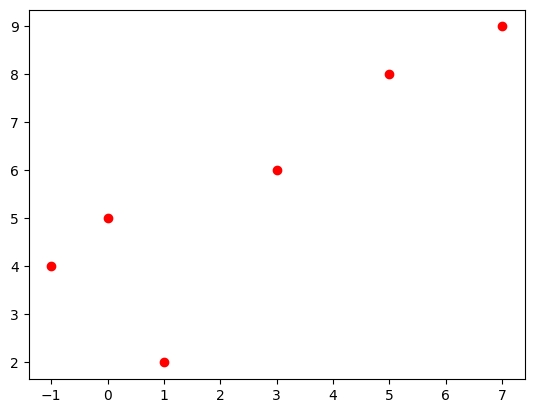

In [27]:
plt.scatter(X,Y,color='r')

In [28]:
x = sym.Symbol('x',real=True)
x

x

In [29]:
def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L


In [30]:
Lagrange(x,X,0)

-x*(1/2 - x/2)*(3/4 - x/4)*(5/6 - x/6)*(7/8 - x/8)

In [31]:
Lagrange(x,X,1)

(1 - x)*(1 - x/3)*(1 - x/5)*(1 - x/7)*(x + 1)

In [32]:
Lagrange(x,X,2)

x*(7/6 - x/6)*(5/4 - x/4)*(3/2 - x/2)*(x/2 + 1/2)

In [33]:
Lagrange(x,X,2).subs(x,3)

0

In [34]:
def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

In [35]:
x1 = np.linspace(X[0],X[-1],50)
y1 = Interpolate(x1,X,Y)

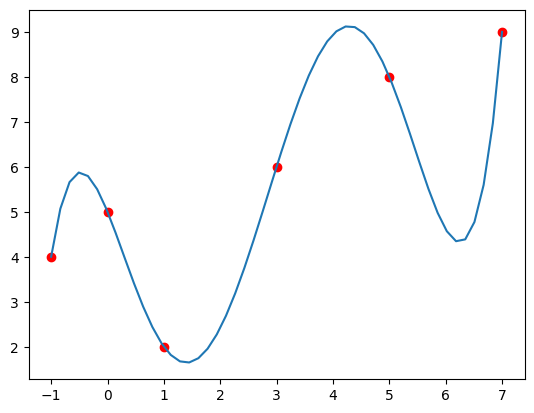

In [36]:
plt.scatter(X,Y,color='r')
plt.plot(x1,y1)

In [37]:
poly = Interpolate(x,X,Y)
poly = poly.expand()
poly

461*x**5/13440 - 55*x**4/112 + 131*x**3/64 - 169*x**2/112 - 41411*x/13440 + 5